## 데이터 로딩 <hr>

In [516]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [517]:
file = '../data/공정데이터 추가자료.csv'
data = pd.read_csv(file)

## 데이터 전처리 <hr>

In [518]:
# 불필요 컬럼(Unnamed: 12 -> 데이터 값이 없거나 0) 제거
data = data.drop(columns=['Unnamed: 12'])

In [519]:
# 'time' 컬럼 확인
data['time'].info

<bound method Series.info of 0         2023-05-18T15:09:19.018900Z
1         2023-05-18T15:09:20.128150Z
2         2023-05-18T15:12:38.819460Z
3         2023-05-18T15:12:39.958188Z
4         2023-05-18T15:12:41.050178Z
                     ...             
235408    2023-10-16T09:34:12.837701Z
235409    2023-10-16T09:34:13.915681Z
235410    2023-10-16T09:34:14.978068Z
235411    2023-10-16T09:34:16.040468Z
235412    2023-10-16T09:34:17.087220Z
Name: time, Length: 235413, dtype: object>

In [520]:
# 'time' 컬럼을 datetime 형식으로 변환
data['time'] = pd.to_datetime(data['time']).dt.tz_localize(None)

In [521]:
# 10월 1일을 기준으로 데이터 분할
oct_1 = pd.Timestamp('2023-10-01')

In [522]:
# 10월 이전 데이터
before_oct_data = data[data['time'] < oct_1]

In [523]:
# 10월 이후 데이터
after_oct_data = data[data['time'] >= oct_1]

In [524]:
# 10월 이전 데이터 형식 확인
before_oct_data

,time,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
0,2023-05-18 15:09:19.018900,8,8,69.6,70,189,180,67.2,70,3.01,67.1,70
1,2023-05-18 15:09:20.128150,8,8,69.8,70,189,180,67.2,70,3.01,67.0,70
2,2023-05-18 15:12:38.819460,8,8,69.7,70,189,180,67.9,70,3.08,65.9,70
3,2023-05-18 15:12:39.958188,8,8,69.7,70,189,180,67.8,70,3.08,65.9,70
4,2023-05-18 15:12:41.050178,8,8,69.7,70,189,180,67.8,70,3.08,65.9,70
...,...,...,...,...,...,...,...,...,...,...,...,...
205731,2023-09-26 05:09:45.964171,8,8,69.4,70,184,1840,66.5,70,0.00,67.7,70
205732,2023-09-26 05:09:46.542218,8,8,69.4,70,184,1840,66.4,70,0.00,67.8,70
205733,2023-09-26 05:09:47.057781,8,8,69.4,70,184,1840,66.5,70,0.00,67.9,70
205734,2023-09-26 05:09:47.604609,8,8,69.4,70,0,1840,66.4,70,0.00,68.0,70


### 피쳐공학적 접근에 따른 데이터 => set_data <hr>

In [525]:
# 불규칙적으로 측정된 'time' 컬럼 제거
set_data = before_oct_data.drop(columns=['time'])
set_data

,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
0,8,8,69.6,70,189,180,67.2,70,3.01,67.1,70
1,8,8,69.8,70,189,180,67.2,70,3.01,67.0,70
2,8,8,69.7,70,189,180,67.9,70,3.08,65.9,70
3,8,8,69.7,70,189,180,67.8,70,3.08,65.9,70
4,8,8,69.7,70,189,180,67.8,70,3.08,65.9,70
...,...,...,...,...,...,...,...,...,...,...,...
205731,8,8,69.4,70,184,1840,66.5,70,0.00,67.7,70
205732,8,8,69.4,70,184,1840,66.4,70,0.00,67.8,70
205733,8,8,69.4,70,184,1840,66.5,70,0.00,67.9,70
205734,8,8,69.4,70,0,1840,66.4,70,0.00,68.0,70


### 모든 설정값이 동일한 s_temp_sv와 c_temp_sv컬럼 drop <hr>

In [526]:
# s_temp_sv와 c_temp_sv 컬럼 제거
set_data = set_data.drop(columns=['s_temp_sv', 'c_temp_sv'])
set_data

,E_scr_pv,E_scr_sv,c_temp_pv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv
0,8,8,69.6,189,180,67.2,70,3.01,67.1
1,8,8,69.8,189,180,67.2,70,3.01,67.0
2,8,8,69.7,189,180,67.9,70,3.08,65.9
3,8,8,69.7,189,180,67.8,70,3.08,65.9
4,8,8,69.7,189,180,67.8,70,3.08,65.9
...,...,...,...,...,...,...,...,...,...
205731,8,8,69.4,184,1840,66.5,70,0.00,67.7
205732,8,8,69.4,184,1840,66.4,70,0.00,67.8
205733,8,8,69.4,184,1840,66.5,70,0.00,67.9
205734,8,8,69.4,0,1840,66.4,70,0.00,68.0


### 2차 미팅 결과 E_scr_sv가 8이 아닌 다른 값으로 셋팅된 것은 다른 제품에 대한 셋팅값으로 판단. 
### 따라서 E_scr_sv가 8인 값만 남김 <hr>

In [527]:
# E_scr_sv 값이 8인 행만 남기기
set_data = set_data[set_data['E_scr_sv'] == 8]

### E_scr_sv 값이 모두 8이므로 학습에 변화량을 제공하지 않아 삭제 <hr>

In [528]:
# E_scr_sv 컬럼 제거
set_data = set_data.drop(columns=['E_scr_sv'])

### E_scr_sv 컬럼 삭제 후 확인 시 n_temp_sv 컬럼이 모두 같은 값으로 통일되었기에 해당 컬럼을 삭제 <hr>

In [529]:
# n_temp_sv 컬럼 제거
set_data = set_data.drop(columns=['n_temp_sv'])

### 남은 컬럼 E_scr_pv, c_temp_pv, k_rpm_pv, k_rpm_sv, n_temp_pv, scale_pv, s_temp_pv 
### 값들에 대해 하나하나 확인  후 전처리 실행 <hr>

#### E_scr_pv의 고유값의 종류가 적음을 그래프로 확인 -> 세부정보 파악

In [530]:
# E_scr_pv 컬럼의 고유값 확인
unique_values = set_data['E_scr_pv'].unique()
print("E_scr_pv 컬럼의 고유값:")
print(unique_values)

E_scr_pv 컬럼의 고유값:
[8 0]


In [531]:
# E_scr_pv 값이 8인 경우와 0인 경우로 데이터 나누기
data_8 = set_data[set_data['E_scr_pv'] == 8]
data_0 = set_data[set_data['E_scr_pv'] == 0]

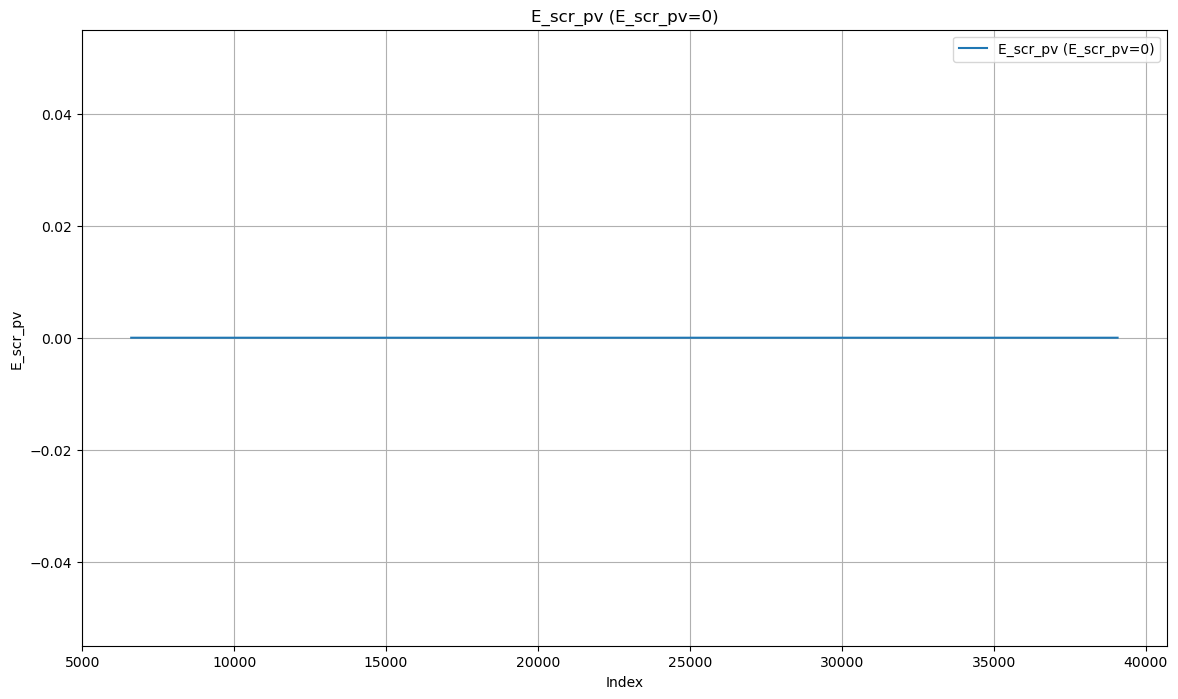

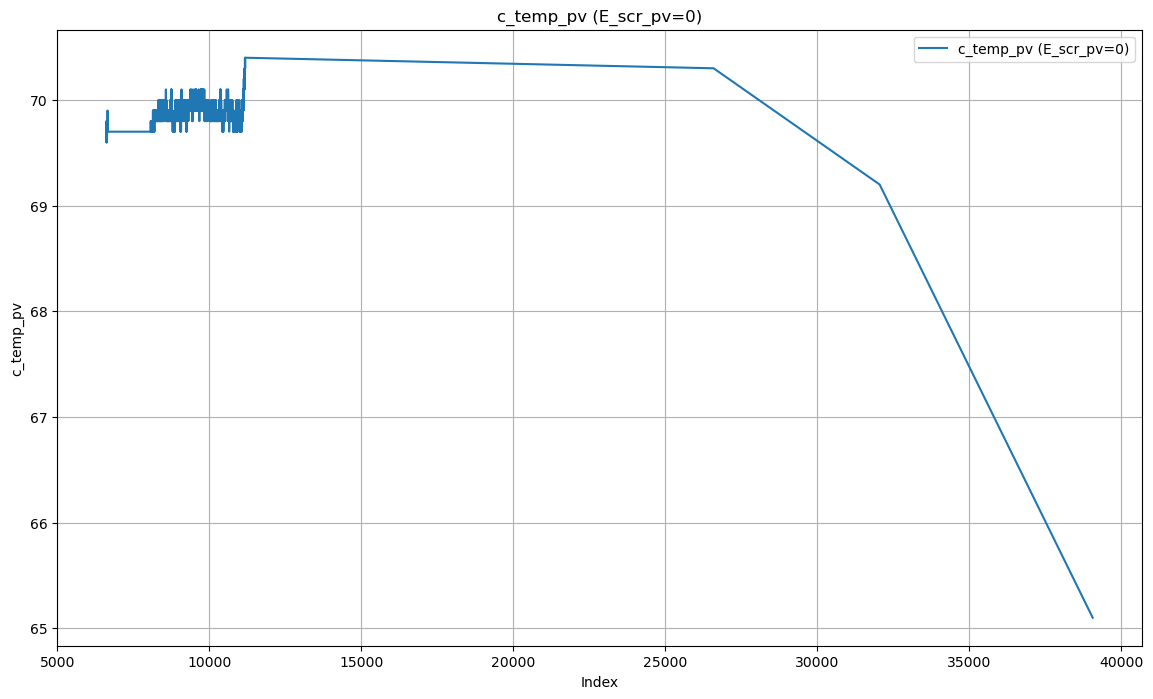

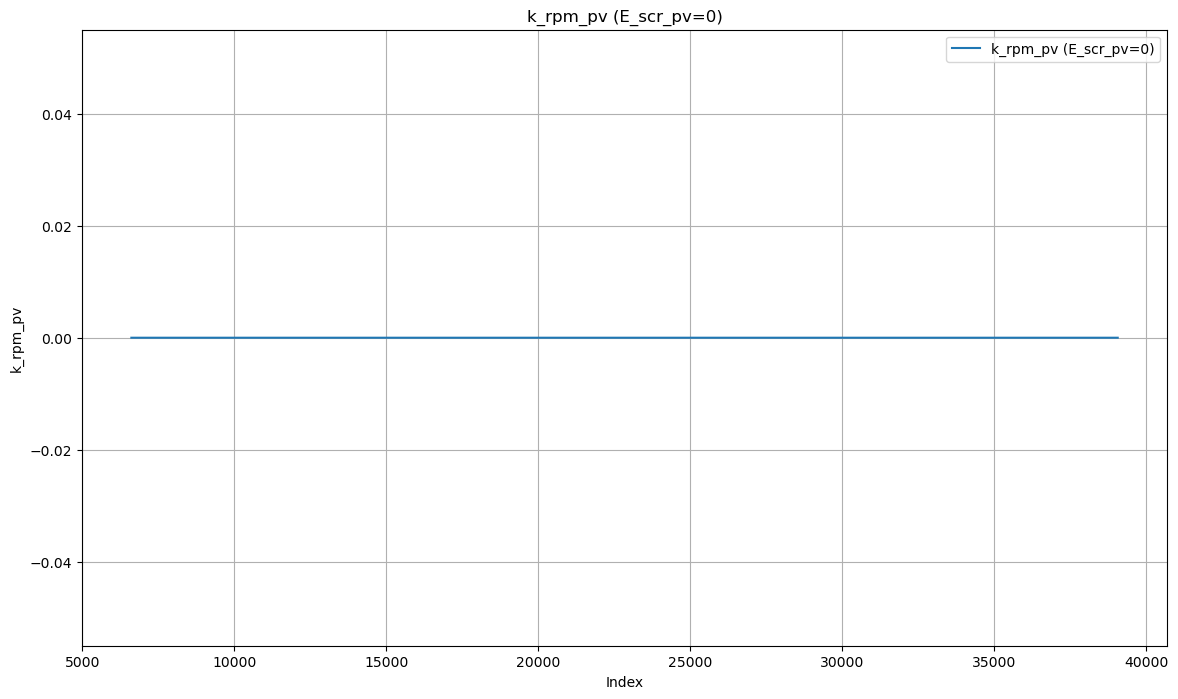

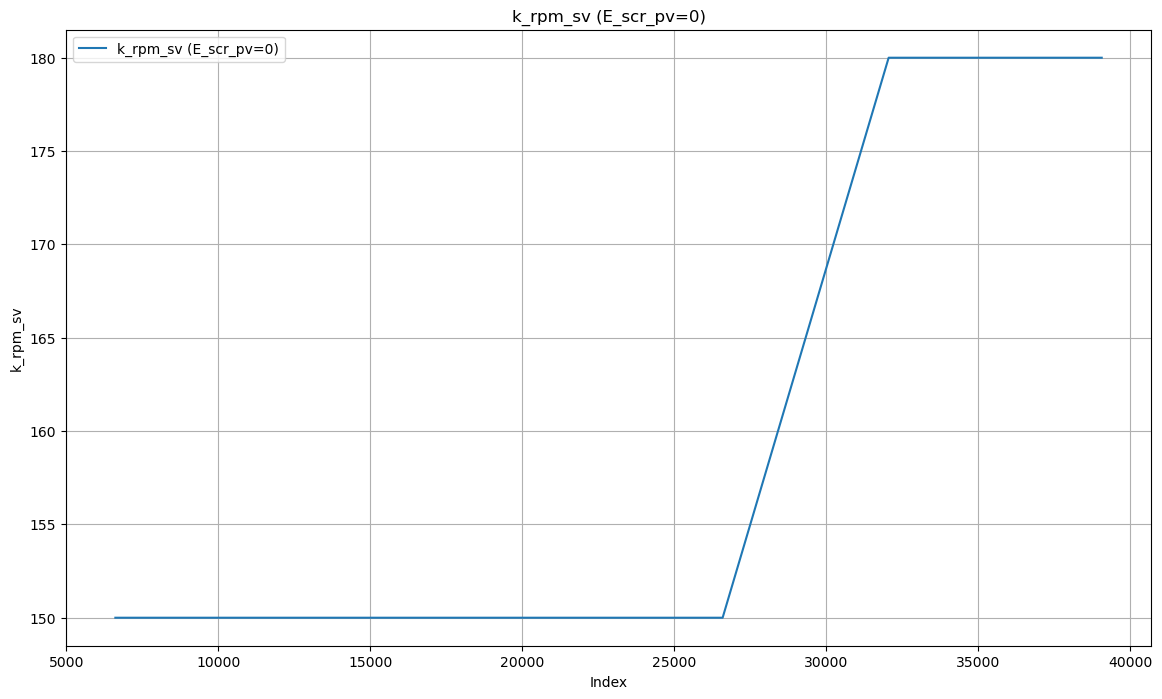

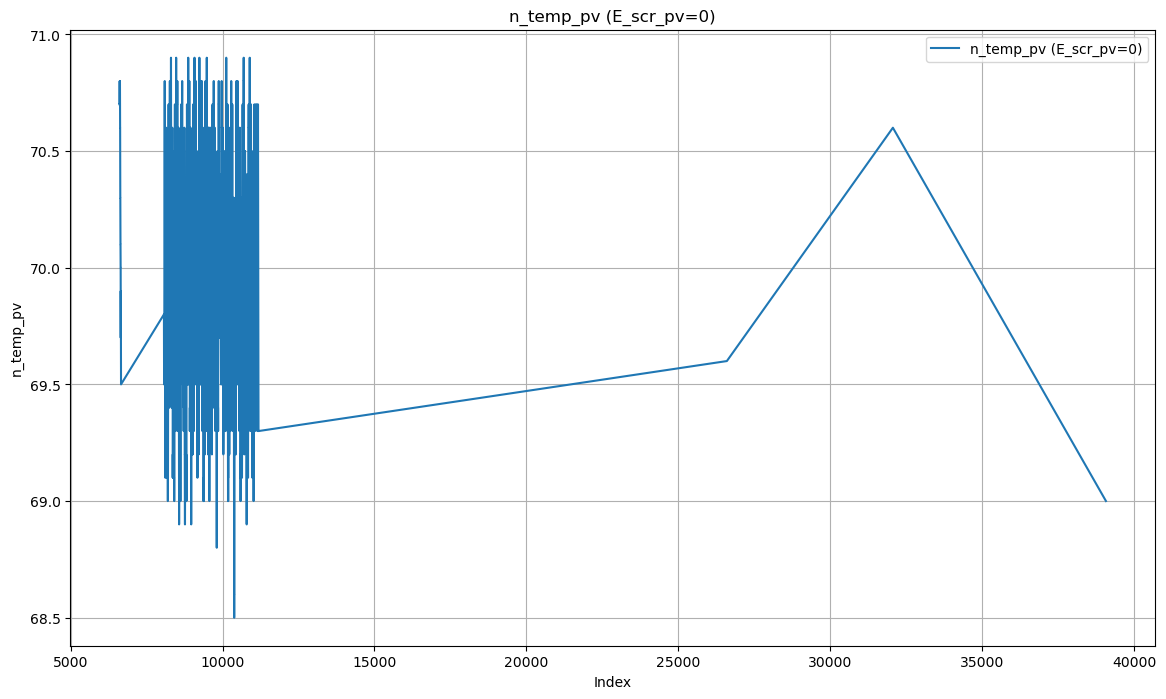

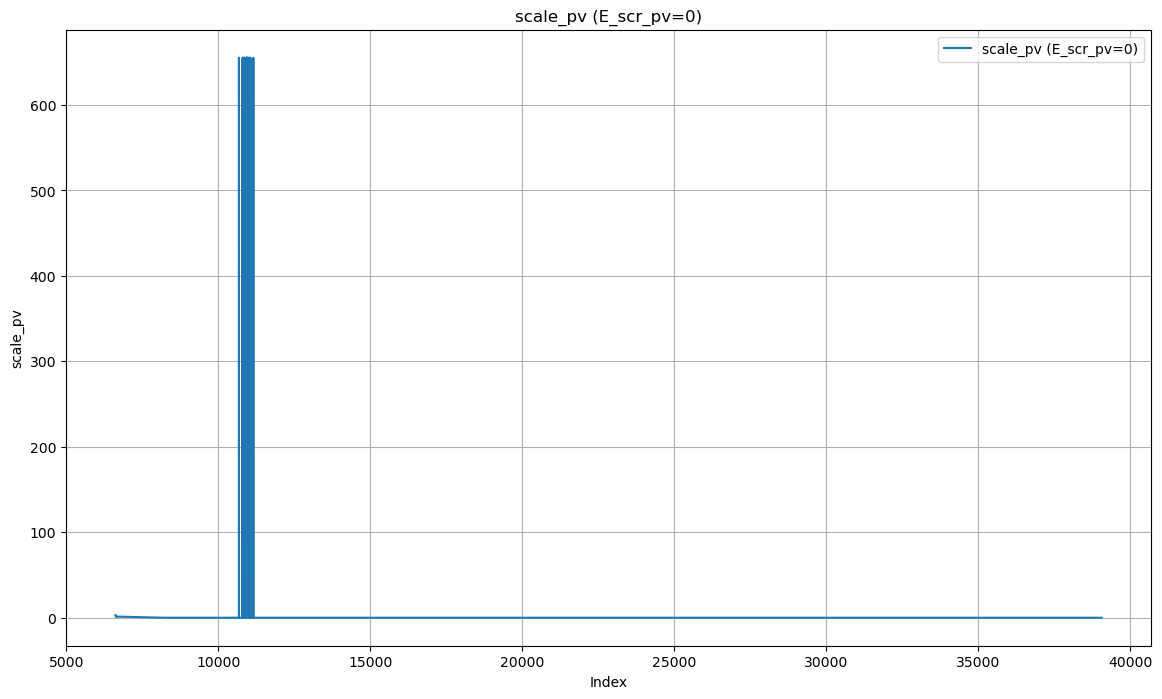

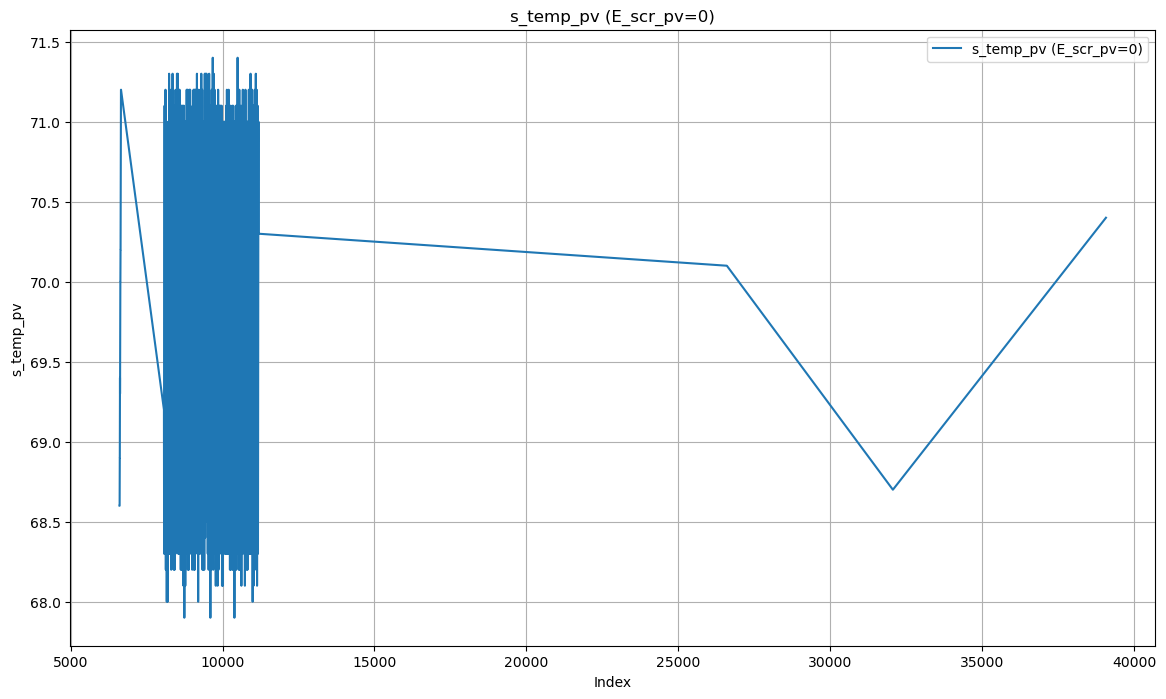

In [532]:
# E_scr_pv 값이 0인 경우의 각 컬럼별 그래프 그리기
for column in data_0.columns:
    plt.figure(figsize=(14, 8))
    plt.plot(data_0.index, data_0[column], label=f'{column} (E_scr_pv=0)')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.title(f'{column} (E_scr_pv=0)')
    plt.legend()
    plt.grid(True)
    plt.show()

### 위의 경우 k_rpm_pv가 모두 0이고, scale_pv값이 0 또는 600이상 값으로만 나옴 <hr>

In [533]:
### scale_pv 값이 600 이상인 행은 기준이 되는 3과 너무 큰 차이가 나므로 측정 오류로 판단, 모두 삭제
final_data = set_data[set_data['scale_pv'] < 600]

### 남은 자료들에 대한 그래프 확인 <hr>

In [534]:
# scale_pv 값이 4 이상인 행 또한 측정 오류로 판단, 모두 삭제
final_data = final_data[final_data['scale_pv'] < 4]

### c_temp_pv 값이 혼자 65.1인 날 E_scr_pv, k_rpm_pv, scale_pv값이 모두 0이므로 삭제<hr>

In [535]:
# c_temp_pv 값이 68 미만인 행 삭제
final_data = final_data[final_data['c_temp_pv'] >= 68]

### 다음 타겟은 k_rpm_sv와 k_rpm_pv의 상관관계 <hr>

k_rpm_sv와 k_rpm_pv의 상관계수: 0.11579511170518067


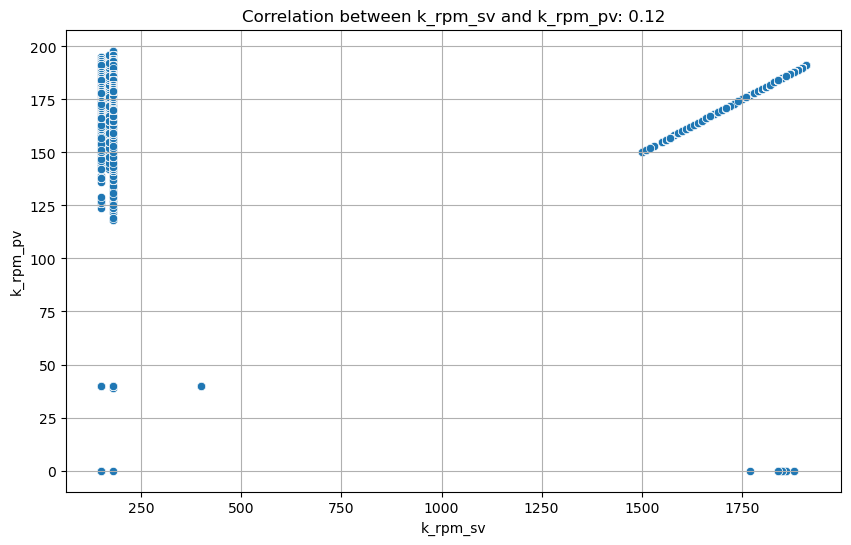

In [536]:
# k_rpm_sv와 k_rpm_pv 상관관계 계산
correlation = final_data['k_rpm_sv'].corr(final_data['k_rpm_pv'])
print(f"k_rpm_sv와 k_rpm_pv의 상관계수: {correlation}")

# k_rpm_sv와 k_rpm_pv 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=final_data['k_rpm_sv'], y=final_data['k_rpm_pv'])
plt.xlabel('k_rpm_sv')
plt.ylabel('k_rpm_pv')
plt.title(f'Correlation between k_rpm_sv and k_rpm_pv: {correlation:.2f}')
plt.grid(True)
plt.show()

### 두 컬럼 사이의 상관관계가 매우 낮고, 실제 칼날 회전수로 파악하는 방식 결정 <hr>

In [537]:
# k_rpm_sv 컬럼 제거
final_data = final_data.drop(columns=['k_rpm_sv'])

In [538]:
# k_rpm_pv 값이 50 미만인 행 필터링
filtered_k_rpm_pv_data = final_data[final_data['k_rpm_pv'] < 50]

# 필터링된 데이터 확인
print("k_rpm_pv 값이 50 미만인 행:")
print(filtered_k_rpm_pv_data)

k_rpm_pv 값이 50 미만인 행:
        E_scr_pv  c_temp_pv  k_rpm_pv  n_temp_pv  scale_pv  s_temp_pv
6613           0       69.7         0       70.7      3.02       68.6
6614           0       69.6         0       70.7      3.02       68.6
6615           0       69.8         0       70.8      3.02       68.8
6616           0       69.8         0       70.8      3.02       68.8
6617           0       69.7         0       70.7      3.02       68.8
...          ...        ...       ...        ...       ...        ...
201771         8       68.9        40       69.6      0.00       69.3
201772         8       68.9        40       69.5      0.00       69.3
201773         8       68.9        40       69.5      0.00       69.0
205734         8       69.4         0       66.4      0.00       68.0
205735         8       69.4         0       66.4      0.00       68.0

[3265 rows x 6 columns]


### E_scr_pv값이 0인 모든 케이스가  k_rpm_sv값이 50미만에 포함, 해당 값들은 scale_pv도 대부분 0 이므로 삭제 <hr>

### -> E_scr_pv 모두 8이라 의미가 없으므로 E_scr_pv 삭제 <hr>

In [539]:
# E_scr_pv 컬럼 제거
final_data = final_data.drop(columns=['E_scr_pv'])

### 다음 절차로 k_rpm_pv값에 대한 접근 -> 50미만 값들은 타겟이 3g인 값들에 대한 k_rpm_sv값 차이가 커 오류로 판단 <hr>

In [540]:
# scale_pv 값이 50 미만인 행 삭제
final_data = final_data[final_data['k_rpm_pv'] >= 50]

### 다음으로, scale_pv에 대한 접근 -> 고유값 우선 확인 <hr>

In [541]:
# scale_pv 컬럼의 고유값 확인
unique_scale_pv_values = final_data['scale_pv'].unique()
print("scale_pv 컬럼의 고유값:")
print(unique_scale_pv_values)

scale_pv 컬럼의 고유값:
[3.01 3.08 3.02 3.04 3.03 3.06 3.05 3.07 3.09 3.19 2.97 3.12 2.96 3.11
 2.95 2.99 3.16 3.   2.98 0.1  3.1  2.91 3.13 0.12 2.89 3.25 3.43 3.35
 3.14 2.56 2.57 3.15 0.13 3.17 3.21 3.24 2.   3.34 3.29 3.22 3.23 3.2
 0.11 0.16 0.15 0.17 0.18 0.19 0.2  0.23 0.22 0.21 0.85 2.82 3.27 2.76
 2.77 2.78 2.75 2.93 2.92 3.41 2.83 3.18 2.94 0.   0.01 0.02 0.03 0.05
 0.06 0.04 0.07 0.08 2.69 0.39 2.85 2.8  2.73 2.74 2.9  3.26 3.37 3.49
 2.72 0.82 2.86 2.71 2.87 2.88 2.79 2.81 2.84]


In [542]:
# 오름차순 정렬
unique_scale_pv_values = np.sort(final_data['scale_pv'].unique())
print('sclae_pv 컬럼의 고유값(오름차순):')
print(unique_scale_pv_values)

sclae_pv 컬럼의 고유값(오름차순):
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.1  0.11 0.12 0.13 0.15
 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.39 0.82 0.85 2.   2.56 2.57
 2.69 2.71 2.72 2.73 2.74 2.75 2.76 2.77 2.78 2.79 2.8  2.81 2.82 2.83
 2.84 2.85 2.86 2.87 2.88 2.89 2.9  2.91 2.92 2.93 2.94 2.95 2.96 2.97
 2.98 2.99 3.   3.01 3.02 3.03 3.04 3.05 3.06 3.07 3.08 3.09 3.1  3.11
 3.12 3.13 3.14 3.15 3.16 3.17 3.18 3.19 3.2  3.21 3.22 3.23 3.24 3.25
 3.26 3.27 3.29 3.34 3.35 3.37 3.41 3.43 3.49]


### scale_pv값이 0 인 경우 미측정, 나머지 0 초과 2 이하의 경우 측정오류로 판단, 제거 <hr>

In [543]:
# scale_pv 값이 0 초과 2 이하인 행 삭제
final_data = final_data[(final_data['scale_pv'] == 0) | (final_data['scale_pv'] > 2)]

# 필터링된 데이터 확인
print("scale_pv 값이 0 초과 2.5 미만인 행 삭제 후 데이터:")
print(final_data.head())

scale_pv 값이 0 초과 2.5 미만인 행 삭제 후 데이터:
   c_temp_pv  k_rpm_pv  n_temp_pv  scale_pv  s_temp_pv
0       69.6       189       67.2      3.01       67.1
1       69.8       189       67.2      3.01       67.0
2       69.7       189       67.9      3.08       65.9
3       69.7       189       67.8      3.08       65.9
4       69.7       189       67.8      3.08       65.9


In [544]:
over_s_temp_pv = final_data[final_data['s_temp_pv'] > 72]
over_s_temp_pv

,c_temp_pv,k_rpm_pv,n_temp_pv,scale_pv,s_temp_pv
61184,70.3,171,69.7,0.0,72.4


In [545]:
# CSV 파일로 저장
output_file = '../data_final/Train_data.csv'
final_data.to_csv(output_file, index=False)

### 최종적으로 미측정값 scale_pv = 0에 대한 데이터 증강 실시 
### 증강 방법은 KNN <hr>